Now I know some of you are thinking, did Kevan spell that 1872 book written by Sarah Woolsey wrong? Well yes, yes I did. Although I do like to think of myself as a clever person when it comes to creating titles.  
The name of that book inspired me to write this blog since I'd be discussing **Predictive Modelling**. 
Another fun fact is that my daughter's name is Kaitlynn and the dataset I will be simulating is loosely based on her life (but more on that later).  

Well before we get started you would notice we aren't in our usual RStudio environment but have moved on to Python and specifically Jupyter Notebooks. 
(R's arch nemesis) - kidding!  

So, "What Kaity Did" and "What Kaity Did Next!" This pretty much sums up Predictive modelling to a certain degree.  
"What Kaity Did" - This is our historical and current data. Everything we know about Kaity and what she did and from this we will try to determine..... you guessed it, "What Kaity Did Next". This the predictive part of things. Using what we know to estimate what will happen.  
There is a lot of terminology I'd introduce here so please be patient with me as I clear up those definitions first (I'd try to keep them short).

__*Predicitve Modelling*__ - a mathematical process that seeks to predict future events or outcomes by analyzing patterns that are likely to forecast future results.  
__*Regression*__ -  statistical method to determine the strength and character of the relationship between one dependent variable and a series of other variables (known as independent variables)  
__*Classification*__-  broad approach that trains a program to categorize new, unlabeled information based upon its relevance to known, labeled data.  
__*Training Data*__ - that is a set of examples used to fit the parameters of a model  
__*Test Data*__ - is a dataset used to provide an unbiased evaluation of a final model fit on the training dataset  

Next consider a study that tests for people having a disease - you can have a disease (positive) or not have the disease (negative)

__*True Positives*__ - measures the proportion of actual positives that are correctly identified (ex. Sick people correctly identified as sick)  
__*True Negatives*__ - measures the proportion of actual negatives that are correctly identified as such (ex.Healthy people correctly identified as healthy)  
__*False positive*__ - measures the proportion of actual positives that have been incorrectly identified. (ex. Healthy people incorrectly identified as sick)  
__*False negative*__- measures the proportion of actual negatives that have been incorrectly identified. (ex. Sick people incorrectly identified as healthy)  

__*Confusion Matrix*__- is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. (summarizes the above)  

Now we got those out of the way, let's get to the meat of the matter. Seeing some of these predictive modelling techniques in practice.       
This brings us to **"What Kaity Did!"** - My daughter is an active five year old and she is constantly on the go and now with the added flexibility of being home-schooled due to Covid19, her days (besides her online classtime) are as obscure and unpredictable as one could imagine. I am going to simulate some data in hourly intervals for the course of a couple weeks to give an idea as to what she does.  

In [640]:
import pandas as pd
header = ['hour','date', 'ds','y']
data  = pd.read_excel(r'C:\Users\krajaram\Desktop\Personal\AIM BLOG\04. What Kaity Did, What Kaity Did Next!\Kaity_Dataset_V2.xlsx', 
                      names = header)
data.head(5)

,hour,date,ds,y
0,1,2020-04-01,2020-04-01 06:00:00,Breakfast
1,2,2020-04-01,2020-04-01 07:00:00,TV
2,3,2020-04-01,2020-04-01 08:00:00,Play With Dolls
3,4,2020-04-01,2020-04-01 09:00:00,Scooter
4,5,2020-04-01,2020-04-01 10:00:00,Class


In [641]:
data.tail(5)

,hour,date,ds,y
493,494,2020-04-21,2020-04-21 19:00:00,Read
494,495,2020-04-21,2020-04-21 20:00:00,Sleep
495,496,2020-04-21,2020-04-21 21:00:00,Sleep
496,497,2020-04-21,2020-04-21 22:00:00,Sleep
497,498,2020-04-21,2020-04-21 23:00:00,Sleep


So, upon importing that simulated data we can see Kaity does a couple different things but the underlying data is pretty straight forward but let's summarize below with 497 observations ranging from simulated data from 01-April-2020 to 21-April-2020.  

In [642]:
data = pd.DataFrame(data)

In [643]:
data.dtypes

hour             int64
date    datetime64[ns]
ds      datetime64[ns]
y               object
dtype: object

We have some simulated data here now which is great for us as we will use what we know about Kaity to try to predict what she will do. 
We have seen four inital variables: *hour*, *date*, *ds* and *y*.

As we have seen though, our depenedent variable *y* is an object so we should probably convert this to an encoded numeric format to make our model make a bit more sense. Modelling with categorical data is rather difficult but it's alot easier when we transform it to a numerical format.

__*No one*__:  
__*Literally no one*__:  
__*Me*__: "So what's the point of all this?"  
__*Also Me*__: "Well I am glad you asked!"   

Well the point of all of this beside me trying to encourage data science and statistics amongst you all is that I want to experiement a bit with analyzing categorical data. Experimenting with continous and discrete data is relatively straightforward but classifying and regressing categorical data is quite interesting. As usual I'd be using some packages to help make our modelling less cumbersome.  

In [644]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Let's summarize the data from our dataset to see what we are working with.

In [645]:
ycounts = pd.DataFrame(data['y'].value_counts())
print(ycounts)

                      y
Sleep               204
TV                   45
Video Games          30
Scooter              24
Read                 24
Lunch                21
Class                21
Breakfast            21
Dinner               21
Play With Dolls      18
Youtube              18
Snack                15
Church                6
Ballet                6
Grocery Shopping      6
Chores                6
Board Games           6
Random Things         3
Physical Education    3


Most of the categories seem to have a significant count but to make the smaller counts easier to work with let's group it.

In [648]:
data['y']=np.where(data['y'] =='Church', 'Misc', data['y'])
data['y']=np.where(data['y'] =='Ballet', 'Misc', data['y'])
data['y']=np.where(data['y'] =='Grocery Shopping', 'Misc', data['y'])
data['y']=np.where(data['y'] =='Chores', 'Misc', data['y'])
data['y']=np.where(data['y'] =='Board Games', 'Misc', data['y'])
data['y']=np.where(data['y'] =='Random Things', 'Misc', data['y'])
data['y']=np.where(data['y'] =='Physical Education', 'Misc', data['y'])


In [649]:
ycounts = pd.DataFrame(data['y'].value_counts())
print(ycounts)

                   y
Sleep            204
TV                45
Misc              36
Video Games       30
Read              24
Scooter           24
Lunch             21
Breakfast         21
Class             21
Dinner            21
Youtube           18
Play With Dolls   18
Snack             15


There we go that's a lot easier on the eyes and would be a lot easier for our computations as well.  
Now let's do that transformation, I was telling you about earlier.

In [650]:
for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

In [651]:
data['y'].value_counts()

8     204
10     45
4      36
11     30
7      24
6      24
3      21
2      21
1      21
0      21
12     18
5      18
9      15
Name: y, dtype: int64

As you can see from the above output, we transformed the data, where each number represents some category for *y* (which was Kaity's activity).  
For example 8 = Sleep, etc.  

In [652]:
##data['date'] = data['ds'].dt.date
##data['hour'] = pd.Series([val.time() for val in data['ds']])
##df_time = data['ds']
##data['year'] = df_time.dt.year
##data['month'] = df_time.dt.month
##data['week'] = df_time.dt.dayofweek
##data['day'] = df_time.dt.day
##data['hour'] = df_time.dt.hour

In [653]:
data = pd.DataFrame(data)

Okay so we now reach the first milestone; here we will begin splitting the data set into our training and testing data sets and begin performing our different techniques between classification and regression.  
We would also normalize the variables since they all have different scales (categories units of measurement is different from hours).  

In [654]:
from sklearn.model_selection import train_test_split
Y = data.loc[:,'y'].values
cols = ['hour']
X =  pd.DataFrame(data[cols])

In [655]:
#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)

In [656]:
from sklearn import preprocessing
train_x_scaled = preprocessing.normalize(train_x, norm='l1') ##here we have scaled the data
test_x_scaled = preprocessing.normalize(test_x, norm='l1')

For our first model we will use a **Random Forest**. According to Wikipedia a Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees. 

More on Random Forests [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [657]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000, random_state = 0)
#Train the model using the training sets y_pred=clf.predict(test_x_scaled)
clf.fit(train_x_scaled,train_y)
y_pred=clf.predict(test_x_scaled)

In [658]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(test_y, y_pred)) Or we can use MAPE see below

In [659]:
errors = abs(y_pred - test_y)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs(errors / y_pred)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 67.83 %.


This isn't a bad perfomance - not great but not bad either. It could definitely use some improvement and this where we do hyperparameter tuning also known as adjusting the existing settings to improve results.   
Let's look at another method, namely Multinomial Logistic Regression which are probability based regression models.  
The **Multinomial Logistic Regression** model is a classification method that generalizes logistic regression to multiclass problems, that is, with more than two possible discrete outcomes - and since our dependent variable has many outcomes, this method seems very appropriate.  

More on Multinomial Logistic Regression [here](https://www.statisticshowto.com/multinomial-logistic-regression/).

In [660]:
# Train multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, mul_lr.predict(train_x)))

Multinomial Logistic regression Train Accuracy ::  0.4454022988505747


44% accuracy. Again, not the best but we are seeing different levels of accuracy on different models. Again working with multiclass categories are proving to be less than ideal but there are again hypertunings we can do. (We won't cover those today).

Let's look at one more method. Let's look at this problem using the **fbprophet** package.
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with dates including seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
Please also note that installing Prophet with pip is quite challenging but a lot easier using Conda.

Since we are using time (ds) as a regressor to see what Kaity does, this method is useful.

Here is great read on fbprophet [here](https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274).

In [599]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

Importing plotly failed. Interactive plots will not work.


In [629]:
data  = pd.read_excel(r'C:\Users\krajaram\Desktop\Personal\AIM BLOG\04. What Kaity Did, What Kaity Did Next!\Kaity_Dataset_V1.xlsx')

for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

split = np.random.rand(len(data)) < 0.9
df_train = data[split]
df_test = data[~split]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=442
Testing data set length=57


In [630]:
prophet = Prophet(growth='linear',seasonality_mode='additive')
prophet.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [612]:
future = prophet.make_future_dataframe(freq='H', periods=48)
future.tail()

,ds
487,2020-04-23 20:00:00
488,2020-04-23 21:00:00
489,2020-04-23 22:00:00
490,2020-04-23 23:00:00
491,2020-04-24 00:00:00


In [625]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-04-01 06:00:00,9.840169,5.099714,14.843488
1,2020-04-01 07:00:00,10.071348,5.264576,14.812012
2,2020-04-01 08:00:00,10.691710,5.847001,15.661403
3,2020-04-01 09:00:00,10.257158,5.618018,15.028268
4,2020-04-01 10:00:00,8.593502,4.078862,13.508776


In [626]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
487,2020-04-23 20:00:00,12.637396,7.757912,17.043490
488,2020-04-23 21:00:00,14.710750,10.348861,19.736199
489,2020-04-23 22:00:00,15.122117,10.391397,20.031056
490,2020-04-23 23:00:00,14.372063,9.633018,19.010691
491,2020-04-24 00:00:00,13.935110,8.843997,18.848483


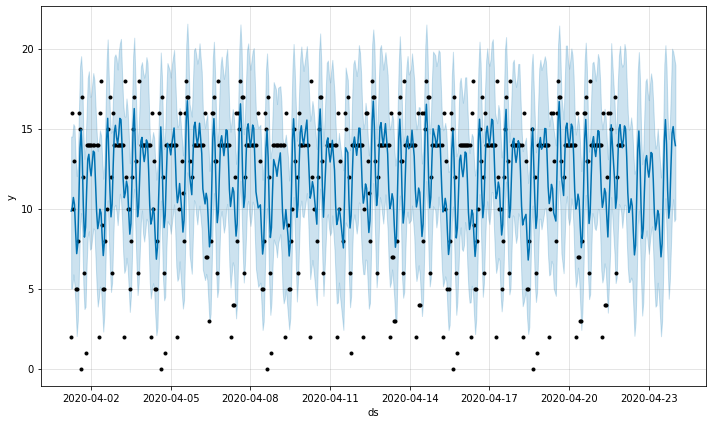

In [615]:
fig1 = prophet.plot(forecast)

Well if we were to just eye ball it this seems to have done a pretty decent job in the classification - she seems to be categorized at sleeping in the night and doing some 'Other' acitivity during the day.
Below does the cross validation on the results and again it could be better but perhaps next time we could use another method for categorizing the data like **One Hot Encoder** just instead of classic categorical encoding. (more on that [here](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/) )

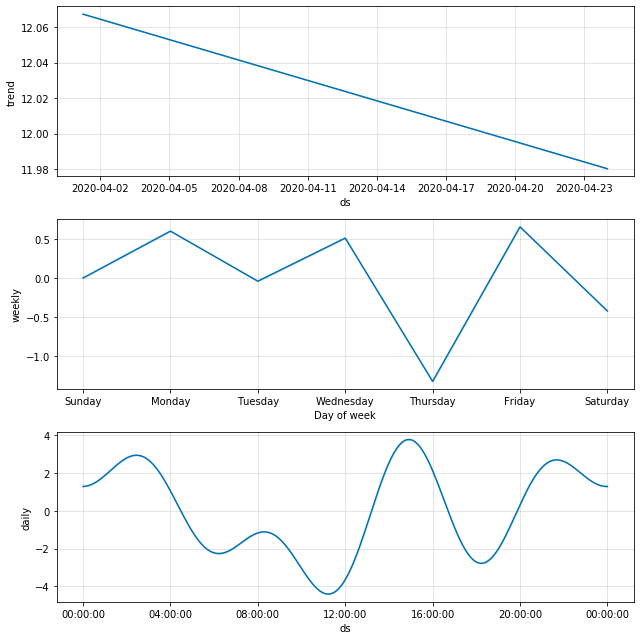

In [616]:
fig2 = prophet.plot_components(forecast)

In [631]:
cross_validation_results = cross_validation(prophet, initial='450 hours', period='1 hour', horizon = '24 hours')
print (cross_validation_results)

INFO:fbprophet:Making 25 forecasts with cutoffs between 2020-04-20 00:00:00 and 2020-04-21 00:00:00


                     ds       yhat  yhat_lower  yhat_upper   y     cutoff
0   2020-04-20 01:00:00  14.682549    9.799965   19.226210  14 2020-04-20
1   2020-04-20 03:00:00  15.235290   10.738830   20.305360  14 2020-04-20
2   2020-04-20 04:00:00  13.394785    8.569138   18.068166  14 2020-04-20
3   2020-04-20 07:00:00  10.952794    6.294524   16.110686  16 2020-04-20
4   2020-04-20 08:00:00  11.949145    7.453666   16.712880   7 2020-04-20
..                  ...        ...         ...         ...  ..        ...
526 2020-04-21 20:00:00  13.728803    9.493285   18.780030  14 2020-04-21
527 2020-04-21 21:00:00  15.486538   10.547454   20.159138  14 2020-04-21
528 2020-04-21 22:00:00  15.552776   10.546124   20.553752  14 2020-04-21
529 2020-04-21 23:00:00  14.592279    9.801078   19.735886  14 2020-04-21
530 2020-04-22 00:00:00  14.099217    9.689777   18.827583  14 2020-04-21

[531 rows x 6 columns]


In [632]:
performance_metrics_results = performance_metrics(cross_validation_results)
print (performance_metrics_results)

           horizon        mse      rmse       mae      mape     mdape  \
0  0 days 03:00:00  11.721123  3.423613  2.489481  0.351803  0.088618   
1  0 days 04:00:00  11.667733  3.415806  2.477239  0.352305  0.097021   
2  0 days 05:00:00  11.673228  3.416611  2.488499  0.353052  0.096601   
3  0 days 06:00:00  12.839913  3.583282  2.616653  0.428339  0.091977   
4  0 days 07:00:00  14.271926  3.777820  2.784186  0.502475  0.091380   
5  0 days 08:00:00  15.897878  3.987214  2.940210  0.567183  0.107412   
6  0 days 09:00:00  17.581474  4.193027  3.090024  0.623497  0.099178   
7  0 days 10:00:00  18.348790  4.283549  3.155938  0.652581  0.102175   
8  0 days 11:00:00  18.491845  4.300215  3.159945  0.617177  0.118546   
9  0 days 12:00:00  18.073752  4.251324  3.085592  0.549873  0.108227   
10 0 days 13:00:00  18.102015  4.254646  3.107122  0.516556  0.118519   
11 0 days 14:00:00  17.865745  4.226789  3.080624  0.507777  0.122311   
12 0 days 15:00:00  17.381327  4.169092  2.994120  

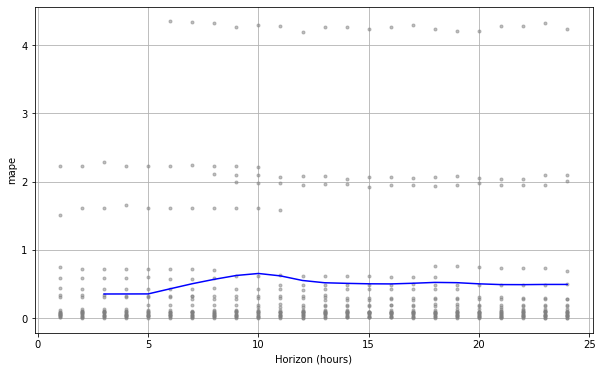

In [633]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cross_validation_results, metric='mape')


The MAPE (mean absolute percentage error) is very high for this and this is most likely due to the fact that the categorical data gave the impression it was important (ordinal) but it wasn't.

Nonetheless, this was still a great exercise and I am truly satisfied with the not satisfying results but I guess it really is difficult to predict human behavious (especially with children) but I really enjoyed conducting this analysis and examining different ways to bring forth this blog to you.  
Hope you had a great read and that we can continue exploring other problems and solutions together!  
**_Until next time - stay safe and see you then!_**